<a href="https://colab.research.google.com/github/prachish820/speech-activity-detection/blob/main/PRA1_2_V21078.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

(500, 2)


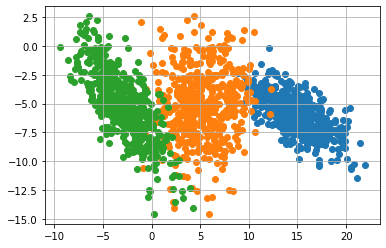

In [ ]:
plt.figure()
lc1 = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q2/l_class1.txt')
lc2 = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q2/l_class2.txt')
lc3 = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q2/l_class3.txt')
print(lc1.shape)
plt.scatter(lc1[:,0],lc1[:,1])
plt.scatter(lc2[:,0],lc3[:,1])
plt.scatter(lc3[:,0],lc3[:,1])
plt.grid(True)

(500, 2)


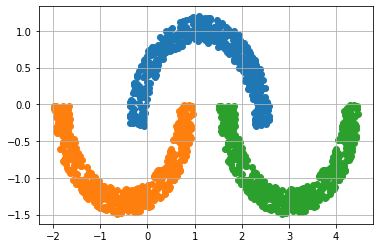

In [ ]:
plt.figure()
nlc1 = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q2/nl_class1.txt')
nlc2 = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q2/nl_class2.txt')
nlc3 = np.loadtxt('/content/drive/MyDrive/PRA_V21078/Q2/nl_class3.txt')
print(nlc3.shape)
plt.scatter(nlc1[:,0],nlc1[:,1])
plt.scatter(nlc2[:,0],nlc3[:,1])
plt.scatter(nlc3[:,0],nlc3[:,1])
plt.grid(True)

In [ ]:
lc_1_y = (np.full((len(lc1)), 1)).reshape(500,1)
lc_2_y = (np.full((len(lc2)), 2)).reshape(500,1)
lc_3_y = (np.full((len(lc3)), 3)).reshape(500,1)

lc_y_inter = np.concatenate((lc_1_y, lc_2_y))
lc_y = np.concatenate((lc_y_inter,lc_3_y))

print(lc_y.shape)

(1500, 1)


In [ ]:
lc_inter = np.concatenate((lc1, lc2))
lc_x = np.concatenate((lc_inter,lc3))
print(lc_x.shape)

(1500, 2)


In [ ]:
nlc_1_y = (np.full((len(nlc1)), 1)).reshape(500,1)
nlc_2_y = (np.full((len(nlc2)), 2)).reshape(500,1)
nlc_3_y = (np.full((len(nlc3)), 3)).reshape(500,1)

nlc_y_inter = np.concatenate((nlc_1_y, nlc_2_y))
nlc_y = np.concatenate((nlc_y_inter,nlc_3_y))

print(nlc_y.shape)


(1500, 1)


In [ ]:
nlc_inter = np.concatenate((nlc1, nlc2))
nlc_x = np.concatenate((nlc_inter,nlc3))
print(nlc_x.shape)

(1500, 2)


In [ ]:
lc_x_train, lc_x_test,lc_y_train,lc_y_test = train_test_split(lc_x,lc_y, test_size=0.5, random_state=42)

In [ ]:
nlc_x_train, nlc_x_test,nlc_y_train,nlc_y_test = train_test_split(nlc_x,nlc_y, test_size=0.5, random_state=42)

In [ ]:
def mean(N):
    return np.mean(N)

In [ ]:
def metrix(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
def stdev(numbers):
    return np.std(numbers)


In [ ]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov


In [ ]:
def Resulted (y_true,y_pred): 
    FP,TP,FN,TN = metrix(y_true,y_pred)
    Result = []
    Accuracy = np.sum(np.equal(y_true, y_pred)) / len(y_true)
    precision = precision_score(y_true, y_pred, pos_label='positive',average='micro')
    recall = recall_score(y_true, y_pred,pos_label='positive',average='micro')
    F1_score = f1_score(y_true, y_pred, pos_label='positive',average='micro')
    Result = [Accuracy,precision,recall,F1_score]
    return(Result)

In [ ]:
def separate_by_class(dataset):
    separated = {}
    for i in range(len(dataset)):
        row = dataset[i]
        if row[-1] not in separated:
            separated[row[-1]] = []
        separated[row[-1]].append(row)
    return separated

In [ ]:
def model(dataset):
    """Find the mean and standard deviation of each feature in dataset"""
    models = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    models.pop() 
    return models

In [ ]:
def model_by_class(dataset):
    """find the mean and standard deviation of each feature in dataset by their class"""
    separated = separate_by_class(dataset)
    class_models = {}
    for (classValue, instances) in separated.iteritems():
        class_models[classValue] = model(instances)
    return class_models


In [ ]:
def calculate_pdf(x, mean, stdev):
    """Calculate probability using gaussian density function"""
    if stdev == 0.0:
        if x == mean:
            return 1.0
        else:
            return 0.0
        
        
    exponent = (np.pi*stdev) * np.exp(-0.5*((x-mean)/stdev)**2)
    return exponent

In [ ]:
def norm_pdf_multivariate(z, μ, Σ):
    """
    The density function of multivariate normal distribution.

    Parameters
    ---------------
    z: ndarray(float, dim=2)
        random vector, N by 1
    μ: ndarray(float, dim=1 or 2)
        the mean of z, N by 1
    Σ: ndarray(float, dim=2)
        the covarianece matrix of z, N by 1
    """

    z = np.atleast_2d(z)
    μ = np.atleast_2d(μ)
    Σ = np.atleast_2d(Σ)
    

    N = z.size
    temp1 = np.linalg.det(Σ) 
    temp2 = np.exp(-.5 * (z.T - μ.T).T @ np.linalg.inv(Σ) @ (z.T - μ.T))
    
    return (2 * np.pi) ** (-N/2) * temp1 * temp2

In [ ]:
def calculate_class_probabilities(models, input,C):
    """Calculate the class probability for input sample. Combine probability of each feature"""
    probabilities = {}
    if C == 'C1':
        for (classValue, classModels) in models.items():
                probabilities[classValue] = 1
                for i in range(len(classModels)):
                   (mean, stdev) = classModels[i]
                   x = input[i]
                   probabilities[classValue] *= calculate_pdf(x, mean, stdev)
    if C == 'C2' or C == 'C3' or C == 'C4':
        for (classValue, classModels) in models.items():
          
          mean = [classModels[0][0],classModels[1][0]]
          sigma = classModels[0][1]
          x = input[0:2]
          probabilities[classValue] =(norm_pdf_multivariate(x, mean, sigma))            
    return probabilities

In [ ]:
def predict(models, inputVector,C):
    """Compare probability for each class. Return the class label which has max probability."""
    probabilities = calculate_class_probabilities(models, inputVector,C)
    (bestLabel, bestProb) = (None, -1)
    for (classValue, probability) in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [ ]:
def Classifier1(lc_x_train, lc_x_test,lc_y_train,lc_y_test) :
    
    lc_train = np.hstack((lc_x_train, lc_y_train))
     
    separated = {}
    for i in range(len(lc_train)):
        row = lc_train[i]
        if row[-1] not in separated:
            separated[row[-1]] = []
        separated[row[-1]].append(row)
        
    class_models = {}
    
    for (classValue, instances) in separated.items():
        class_models[classValue] = [(mean(attribute), stdev(attribute)) for attribute in zip(*instances)]
        class_models[classValue].pop()
        
    avg_std=0
    
    for (classValue, classModels) in class_models.items():
        avg_std = avg_std+classModels[0][1]+classModels[1][1]
        
    avg_std = float(avg_std/6)
    
    class_models = {}
    
    for (classValue, instances) in separated.items():
        class_models[classValue] = [(mean(attribute), avg_std) for attribute in zip(*instances)]
        class_models[classValue].pop()
        
    predictions = []
    
    lc_test = np.hstack((lc_x_test, lc_y_test))
    
    for i in range(len(lc_test)):
        result = predict(class_models, lc_test[i],'C1')
        predictions.append(result)
    predictions = np.array(predictions)
    predictions = predictions.reshape(750,1)
    
    Results = Resulted(lc_y_test,predictions)
    
    fig, ax = plt.subplots()
    
    lc_pred_out = np.hstack((lc_x_test, predictions))
    s = ax.scatter(lc_pred_out[:,0], lc_pred_out[:,1], c=lc_pred_out[:,2], s=100, marker='*', cmap='plasma')
    
    legend1 = ax.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    ax.add_artist(legend1)
    
    fig.colorbar(s)
    plt.legend()
    plt.show()
    
    return Results

In [ ]:
def Classifier2(lc_x_train, lc_x_test,lc_y_train,lc_y_test) :
    lc_train = np.hstack((lc_x_train, lc_y_train))
    
    separated = {}
    for i in range(len(lc_train)):
        row = lc_train[i]
        if row[-1] not in separated:
            separated[row[-1]] = []
        separated[row[-1]].append(row)
        
    class_models = {}
    
    for (classValue, instances) in separated.items():
        class_models[classValue] = [(mean(attribute), stdev(attribute)) for attribute in zip(*instances)]
        class_models[classValue].pop()
        
    avg_std_1 = 0
    avg_std_2 = 0
    
    for (classValue, classModels) in class_models.items():
            avg_std_1 = avg_std_1+classModels[0][1]
            avg_std_2 = avg_std_2+classModels[1][1]
            
    avg_std_1 = float(avg_std_1/3)
    avg_std_2 = float(avg_std_2/3)
    
    Covariance = covariance(lc_x_train[:,0],lc_x_train[:,1])
    
    cov_avg = np.average(Covariance) 
    
    Sigma = [[avg_std_1,cov_avg],[cov_avg,avg_std_2]]
    
    class_models = {}
    
    for (classValue, instances) in separated.items():
            class_models[classValue] = [(mean(attribute), Sigma) for attribute in zip(*instances)]
            class_models[classValue].pop() 
    
    predictions = []
    
    lc_test = np.hstack((lc_x_test, lc_y_test))
    
    for i in range(len(lc_test)):
        result = predict(class_models, lc_test[i],'C2')
        predictions.append(result)
    predictions = np.array(predictions)
    predictions = predictions.reshape(750,1)
    
    Results = Resulted(lc_y_test,predictions)
    
    fig, ax = plt.subplots()
    
    lc_pred_out = np.hstack((lc_x_test, predictions))
    s = ax.scatter(lc_pred_out[:,0], lc_pred_out[:,1], c=lc_pred_out[:,2], s=100, marker='*', cmap='plasma')
    fig.colorbar(s)

    legend1 = ax.legend(*s.legend_elements(),
                   loc="upper right", title="Classes")
    ax.add_artist(legend1)
    
    plt.show()
    
    return Results

In [ ]:
def Classifier3(lc_x_train, lc_x_test,lc_y_train,lc_y_test) :
    lc_train = np.hstack((lc_x_train, lc_y_train))
    
    separated = {}
    for i in range(len(lc_train)):
        row = lc_train[i]
        if row[-1] not in separated:
            separated[row[-1]] = []
        separated[row[-1]].append(row)
        
    class_models = {}
    
    for (classValue, instances) in separated.items():
        class_models[classValue] = [(mean(attribute), stdev(attribute)) for attribute in zip(*instances)]
        class_models[classValue].pop()
        
    Sigma_1 = [[0,0],[0,0]]
    Sigma_2 = [[0,0],[0,0]]
    Sigma_3 = [[0,0],[0,0]]
    
    for (classValue, classModels) in class_models.items():
        if classValue == 1.0: 
            Sigma_1[0][0] = classModels[0][1]
            Sigma_1[1][1]=classModels[1][1]
        elif classValue == 2.0: 
            Sigma_2[0][0] = classModels[0][1]
            Sigma_2[1][1]= classModels[1][1]
        elif classValue == 3.0: 
            Sigma_3[0][0] = classModels[0][1]
            Sigma_3[1][1] =classModels[1][1]
    
    class_models = {}
    
    for (classValue, instances) in separated.items():
        if classValue == 1.0: 
            class_models[classValue] = [(mean(attribute), Sigma_1) for attribute in zip(*instances)]
            class_models[classValue].pop()  
        elif classValue == 2.0: 
            class_models[classValue] = [(mean(attribute), Sigma_2) for attribute in zip(*instances)]
            class_models[classValue].pop()             
        elif classValue == 3.0: 
            class_models[classValue] = [(mean(attribute), Sigma_3) for attribute in zip(*instances)]
            class_models[classValue].pop() 
    predictions = []
    lc_test = np.hstack((lc_x_test, lc_y_test))
    
    for i in range(len(lc_test)):
        result = predict(class_models, lc_test[i],'C2')
        predictions.append(result)
    predictions = np.array(predictions)
    predictions = predictions.reshape(750,1)
    
    Results = Resulted(lc_y_test,predictions)
    
    fig, ax = plt.subplots()
    
    lc_pred_out = np.hstack((lc_x_test, predictions))
    s = ax.scatter(lc_pred_out[:,0], lc_pred_out[:,1], c=lc_pred_out[:,2], s=100, marker='*', cmap='plasma')
    fig.colorbar(s)

    legend1 = ax.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    ax.add_artist(legend1)
    
    plt.show()
    
    return Results

In [ ]:
def Classifier4(lc_x_train, lc_x_test,lc_y_train,lc_y_test) :
    lc_train = np.hstack((lc_x_train, lc_y_train))
    
    separated = {}
    for i in range(len(lc_train)):
        row = lc_train[i]
        if row[-1] not in separated:
            separated[row[-1]] = []
        separated[row[-1]].append(row)
        
    class_models = {}
    
    for (classValue, instances) in separated.items():
        class_models[classValue] = [(mean(attribute), stdev(attribute)) for attribute in zip(*instances)]
        class_models[classValue].pop()
    
    Covariance = covariance(lc_x_train[:,0],lc_x_train[:,1])
    cov_avg = np.average(Covariance) 
    
    Sigma_1 = [[0,0],[0,0]]
    Sigma_2 = [[0,0],[0,0]]
    Sigma_3 = [[0,0],[0,0]]
    
    for (classValue, classModels) in class_models.items():
        if classValue == 1.0: 
            Sigma_1[0][0] = classModels[0][1]
            Sigma_1[0][1] = cov_avg
            Sigma_1[1][0] = cov_avg
            Sigma_1[1][1]=classModels[1][1]
            
        elif classValue == 2.0: 
            Sigma_2[0][0] = classModels[0][1]
            Sigma_1[0][1] = cov_avg
            Sigma_1[1][0] = cov_avg
            Sigma_2[1][1]= classModels[1][1]
        elif classValue == 3.0: 
            Sigma_3[0][0] = classModels[0][1]
            Sigma_1[0][1] = cov_avg
            Sigma_1[1][0] = cov_avg
            Sigma_3[1][1] =classModels[1][1]
    
    class_models = {}
    
    for (classValue, instances) in separated.items():
        if classValue == 1.0: 
            class_models[classValue] = [(mean(attribute), Sigma_1) for attribute in zip(*instances)]
            class_models[classValue].pop()  
        elif classValue == 2.0: 
            class_models[classValue] = [(mean(attribute), Sigma_2) for attribute in zip(*instances)]
            class_models[classValue].pop()             
        elif classValue == 3.0: 
            class_models[classValue] = [(mean(attribute), Sigma_3) for attribute in zip(*instances)]
            class_models[classValue].pop() 
            
    predictions = []
    
    lc_test = np.hstack((lc_x_test, lc_y_test))
    
    for i in range(len(lc_test)):
        result = predict(class_models, lc_test[i],'C2')
        predictions.append(result)
    predictions = np.array(predictions)
    predictions = predictions.reshape(750,1)
    
    Results = Resulted(lc_y_test,predictions)
    
    fig, ax = plt.subplots()
    
    lc_pred_out = np.hstack((lc_x_test, predictions))
    s = ax.scatter(lc_pred_out[:,0], lc_pred_out[:,1], c=lc_pred_out[:,2], s=100, marker='*', cmap='plasma')
    fig.colorbar(s)

    legend1 = ax.legend(*s.legend_elements(),
                    loc="upper right", title="Classes")
    ax.add_artist(legend1)
    
    plt.show()
    
    return Results


In [ ]:
def Model_evaluation(lc_x_train, lc_x_test,lc_y_train,lc_y_test,C) : 
    if C == 'C1':
        Result = Classifier1(lc_x_train, lc_x_test,lc_y_train,lc_y_test) 
    elif C == 'C2':
        Result = Classifier2(lc_x_train, lc_x_test,lc_y_train,lc_y_test)
    elif C == 'C3':
        Result = Classifier3(lc_x_train, lc_x_test,lc_y_train,lc_y_test)
    elif C == 'C4':
        Result = Classifier4(lc_x_train, lc_x_test,lc_y_train,lc_y_test)
    return Result

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


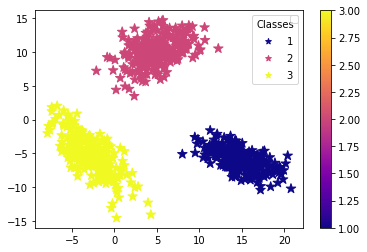

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


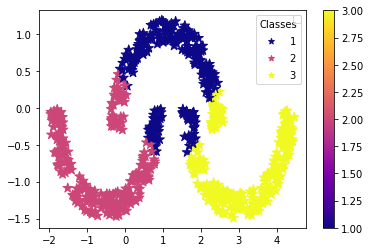

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


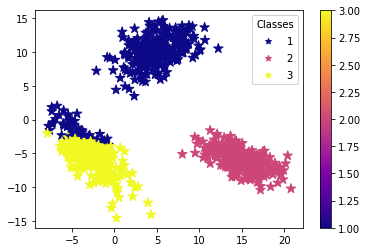

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


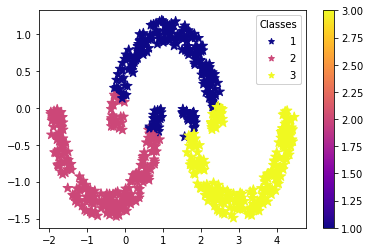

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


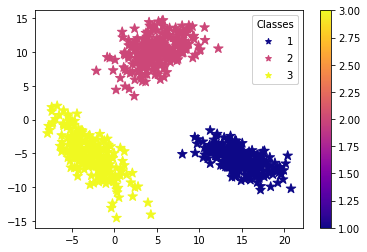

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


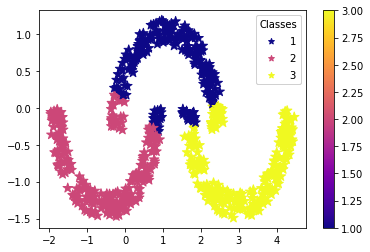

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


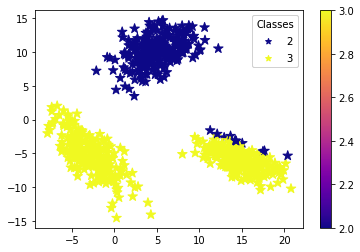

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


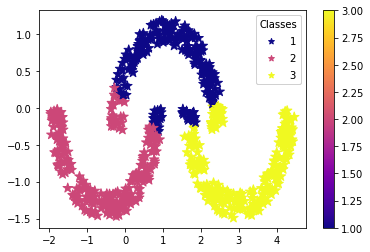

Result Table for Linearly seperable Data
['Accuracy', 'Precision', 'Recall', 'F1 Score']
[[1.         1.         1.         1.        ]
 [0.26533333 0.26533333 0.26533333 0.26533333]
 [1.         1.         1.         1.        ]
 [0.66533333 0.66533333 0.66533333 0.66533333]]

Result Table for Non Linearly seperable Data
['Accuracy', 'Precision', 'Recall', 'F1 Score']
[[0.808      0.808      0.808      0.808     ]
 [0.87466667 0.87466667 0.87466667 0.87466667]
 [0.87866667 0.87866667 0.87866667 0.87866667]
 [0.87733333 0.87733333 0.87733333 0.87733333]]


In [ ]:
Classes = ['C1','C2','C3','C4']
Results_lc = []
Results_nlc = []
for C in Classes:
    Result_lc = Model_evaluation(lc_x_train, lc_x_test,lc_y_train,lc_y_test,C)
    Result_nlc = Model_evaluation(nlc_x_train, nlc_x_test,nlc_y_train,nlc_y_test,C)
    Results_lc.append(Result_lc)  
    Results_nlc.append(Result_nlc)

Results_lc = np. array(Results_lc)
Results_nlc = np. array(Results_nlc)
print('Result Table for Linearly seperable Data')
header = ['Accuracy', 'Precision', 'Recall','F1 Score']
print(header)
print(Results_lc)
print("")
print('Result Table for Non Linearly seperable Data')
print(header)
header = ['Accuracy', 'Precision', 'Recall','F1 Score']
print(Results_nlc)